We'll create a simple simulator where the observed data $X$ is generated from a parameter $\theta$ squared plus some Gaussian noise. We'll use a uniform prior for $\theta$ ranging from 0 to 1, and we'll aim to infer the posterior distribution of $\theta$ given a true observation $x=0.5$.

### Step 1: Define the Simulator

Our simulator function takes a parameter $\theta$ and returns an observation $X$ based on the equation $X = \theta^2 + \text{Gaussian noise}$.

In [1]:
import torch
from sbi import utils as utils
from sbi.inference.base import infer

def simulator(theta):
    noise = torch.randn(theta.shape) * 0.1  # Gaussian noise with standard deviation of 0.1
    return theta**2 + noise

/Users/wenkaipan/miniconda3/envs/sbi_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2: Define the Prior

We define a uniform prior for $\theta$ in the range [0, 1].

In [2]:
prior = utils.BoxUniform(low=-torch.ones(1), high=torch.ones(1))

### Step 3: Generate True Observation

We set the true observation $x=0.5$, which we aim to explain with our model and infer the posterior distribution of $\theta$.

In [3]:
true_observation = torch.tensor([0.5])

### Step 4: Run Inference

We use the `infer` function from `sbi` to perform inference. We'll use Sequential Neural Posterior Estimation (SNPE) as our inference method and generate 1000 simulations.

In [4]:
posterior = infer(simulator, prior, method='NPE', num_simulations=10000)

Running 1000 simulations.: 100%|██████████| 1000/1000 [00:00<00:00, 125913.48it/s]
/Users/wenkaipan/miniconda3/envs/sbi_env/lib/python3.12/site-packages/sbi/neural_nets/flow.py:142: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 33 epochs.

### Step 5: Sample from the Posterior and Analyze

After running the inference, we can sample from the posterior given our true observation and visualize the results.

In [5]:
samples = posterior.sample((10000,), x=true_observation)

Drawing 10000 posterior samples: 10917it [00:00, 233894.11it/s]           


To visualize the posterior distribution of $\theta$, we can use a simple histogram or a pairplot from `sbi`.

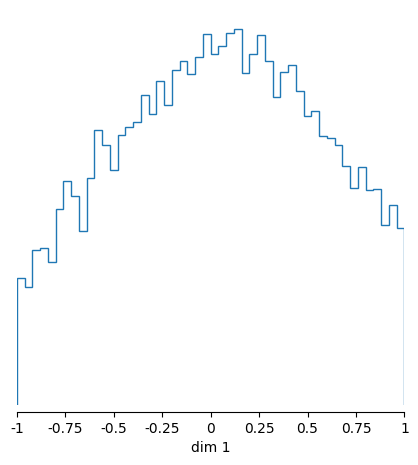

In [7]:
from sbi import analysis as analysis

_ = analysis.pairplot(samples, limits=[[-1, 1]], figsize=(5, 5))

This process demonstrates how to set up a simple simulation-based inference problem using `sbi`. By defining a simulator, specifying a prior, and using observed data, we can infer the posterior distribution of our model parameters using the tools provided by the `sbi` package.